In [1]:
import os
import glob
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from keras.applications import DenseNet121
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import models
from keras.layers.wrappers import TimeDistributed
from keras.layers.core import Dense, Dropout, Flatten, Activation
from keras.layers.convolutional import Conv1D, MaxPooling1D,MaxPooling2D
from keras.layers.recurrent import LSTM,GRU
from keras.layers import Bidirectional
from keras.layers.pooling import GlobalAveragePooling1D
from keras.layers import Dropout
import matplotlib.pyplot as plt
stlf_data=pd.read_csv('C:\\Users\\Khalid\\Desktop\\stlf_github\\stlf_sim\\Data/08_Aug.csv')

In [2]:
stlf_data

,Temp,Hum,A,B,C,D,E,F,G,H,I,J,Cons
0,29.500000,81.000000,1,3,1,3331.0,3320.0,3301.0,3118.0,3254.0,3595.0,3303.750000,3142.0
1,29.416667,81.583333,1,3,1,3347.0,3306.0,3268.0,3078.0,3322.0,3490.0,3294.500000,3157.0
2,29.333333,82.166667,1,3,1,3364.0,3315.0,3259.0,3204.0,3401.0,3443.0,3295.666667,3273.0
3,29.250000,82.750000,1,3,1,3355.0,3345.0,3293.0,3132.0,3350.0,3338.0,3292.000000,3249.0
4,29.166667,83.333333,2,3,1,3142.0,3331.0,3320.0,3116.0,3281.0,3153.0,3283.583333,3219.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8923,30.622452,79.727610,23,7,0,3792.0,3736.0,3703.0,3720.0,4040.0,3951.0,3758.333333,3835.0
8924,30.622452,79.727610,24,7,0,3799.0,3749.0,3687.0,3696.0,4015.0,3893.0,3769.416667,3820.0
8925,30.622452,79.727610,24,7,0,3802.0,3729.0,3698.0,3716.0,3961.0,3931.0,3781.833333,3847.0
8926,30.100000,79.727610,24,7,0,3809.0,3754.0,3710.0,3726.0,3990.0,3952.0,3797.083333,3893.0


In [3]:
stlf_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8928 entries, 0 to 8927
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Temp    8928 non-null   float64
 1   Hum     8928 non-null   float64
 2   A       8928 non-null   int64  
 3   B       8928 non-null   int64  
 4   C       8928 non-null   int64  
 5   D       8928 non-null   float64
 6   E       8928 non-null   float64
 7   F       8928 non-null   float64
 8   G       8928 non-null   float64
 9   H       8928 non-null   float64
 10  I       8928 non-null   float64
 11  J       8928 non-null   float64
 12  Cons    8928 non-null   float64
dtypes: float64(10), int64(3)
memory usage: 906.9 KB


In [4]:
import numpy as np
stlf_data['A']=stlf_data['A'].astype(np.float64)
stlf_data['B']=stlf_data['B'].astype(np.float64)
stlf_data['C']=stlf_data['C'].astype(np.float64)

In [5]:
stlf_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8928 entries, 0 to 8927
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Temp    8928 non-null   float64
 1   Hum     8928 non-null   float64
 2   A       8928 non-null   float64
 3   B       8928 non-null   float64
 4   C       8928 non-null   float64
 5   D       8928 non-null   float64
 6   E       8928 non-null   float64
 7   F       8928 non-null   float64
 8   G       8928 non-null   float64
 9   H       8928 non-null   float64
 10  I       8928 non-null   float64
 11  J       8928 non-null   float64
 12  Cons    8928 non-null   float64
dtypes: float64(13)
memory usage: 906.9 KB


In [6]:
train = stlf_data.copy()[stlf_data.index <= 7392][['Cons','Temp','Hum','A','B','C','D','E','F','G','H','I','J']]

In [7]:
from sklearn.preprocessing import MinMaxScaler
scaler = StandardScaler()
train[['Cons', 'Temp', 'Hum', 'A','B','C','D','E','F','G','H','I','J']] = scaler.fit_transform(train)
train.head()
#train.info()

,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J
0,-0.911426,-0.702480,0.851335,-1.660902,-0.544263,0.592295,-0.167627,-0.213571,-0.291421,-1.078153,-0.563259,0.854451,-0.292385
1,-0.852216,-0.732671,0.904255,-1.660902,-0.544263,0.592295,-0.104349,-0.269056,-0.422470,-1.240372,-0.282731,0.424478,-0.331120
2,-0.394328,-0.762863,0.957175,-1.660902,-0.544263,0.592295,-0.037115,-0.233387,-0.458211,-0.729382,0.043177,0.232014,-0.326234
3,-0.489064,-0.793055,1.010096,-1.660902,-0.544263,0.592295,-0.072709,-0.114491,-0.323190,-1.021376,-0.167220,-0.197959,-0.341588
4,-0.607483,-0.823246,1.063016,-1.516457,-0.544263,0.592295,-0.915110,-0.169976,-0.215968,-1.086264,-0.451873,-0.955531,-0.376833


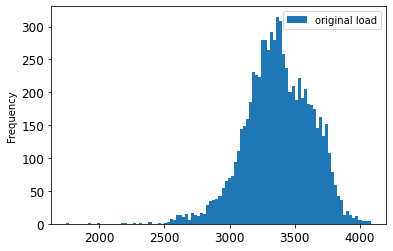

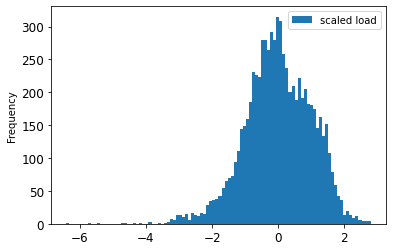

In [8]:
stlf_data[stlf_data.index <= 7392][['Cons']].rename(columns={'Cons':'original load'}).plot.hist(bins=100, fontsize=12)
train[train.index <= 7392][['Cons']].rename(columns={'Cons':'scaled load'}).plot.hist(bins=100, fontsize=12)
plt.show()

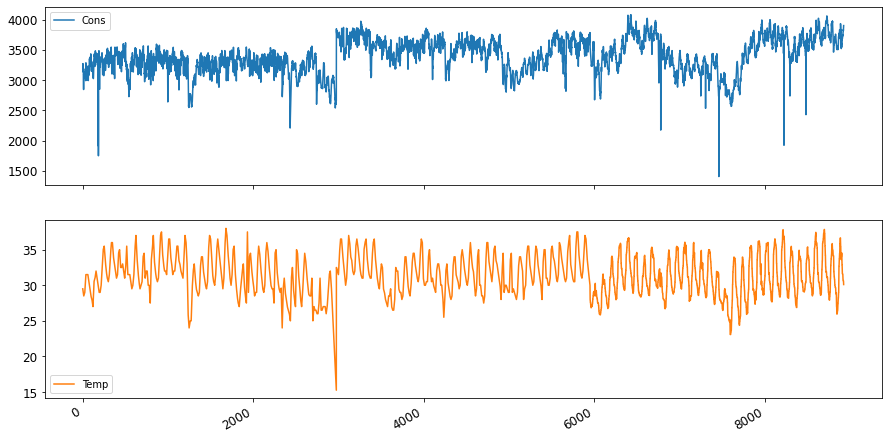

In [9]:
import matplotlib.pyplot as plt
stlf_data.plot(y=['Cons', 'Temp'], subplots=True, figsize=(15, 8), fontsize=12)
plt.show()

In [10]:
train_shifted = train.copy()
train_shifted=train_shifted.astype(np.float64)
train_shifted['y_t+100'] = train_shifted['Cons'].shift(-100)
train_shifted.head(10)

,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J,y_t+100
0,-0.911426,-0.702480,0.851335,-1.660902,-0.544263,0.592295,-0.167627,-0.213571,-0.291421,-1.078153,-0.563259,0.854451,-0.292385,-0.445643
1,-0.852216,-0.732671,0.904255,-1.660902,-0.544263,0.592295,-0.104349,-0.269056,-0.422470,-1.240372,-0.282731,0.424478,-0.331120,-0.765375
2,-0.394328,-0.762863,0.957175,-1.660902,-0.544263,0.592295,-0.037115,-0.233387,-0.458211,-0.729382,0.043177,0.232014,-0.326234,-0.891689
3,-0.489064,-0.793055,1.010096,-1.660902,-0.544263,0.592295,-0.072709,-0.114491,-0.323190,-1.021376,-0.167220,-0.197959,-0.341588,-0.524590
4,-0.607483,-0.823246,1.063016,-1.516457,-0.544263,0.592295,-0.915110,-0.169976,-0.215968,-1.086264,-0.451873,-0.955531,-0.376833,-0.303540
5,-0.864058,-0.853438,1.115936,-1.516457,-0.544263,0.592295,-0.855786,-0.106565,-0.271565,-1.244427,-0.567385,-1.229895,-0.429874,-0.264067
6,-0.836427,-0.883630,1.168857,-1.516457,-0.544263,0.592295,-0.397014,-0.039190,-0.235824,-1.276871,-0.171345,-1.115235,-0.483614,-0.374592
7,-0.990372,-0.913821,1.221777,-1.516457,-0.544263,0.592295,-0.491932,-0.074859,-0.116688,-1.110597,-0.146593,-1.217610,-0.561431,-0.496958
8,-1.085107,-0.944013,1.274697,-1.372011,-0.544263,0.592295,-0.610580,-0.919019,-0.172285,-1.183595,-0.328111,-1.004671,-0.642738,-0.540379
9,-1.602205,-0.974204,1.327618,-1.372011,-0.544263,0.592295,-0.867650,-0.859572,-0.108746,-1.264705,-0.175470,-0.918676,-0.775341,-0.694324


In [11]:
train_shifted = train_shifted.rename(columns={'Cons':'Cons_original'})
train_shifted.head(10)

,Cons_original,Temp,Hum,A,B,C,D,E,F,G,H,I,J,y_t+100
0,-0.911426,-0.702480,0.851335,-1.660902,-0.544263,0.592295,-0.167627,-0.213571,-0.291421,-1.078153,-0.563259,0.854451,-0.292385,-0.445643
1,-0.852216,-0.732671,0.904255,-1.660902,-0.544263,0.592295,-0.104349,-0.269056,-0.422470,-1.240372,-0.282731,0.424478,-0.331120,-0.765375
2,-0.394328,-0.762863,0.957175,-1.660902,-0.544263,0.592295,-0.037115,-0.233387,-0.458211,-0.729382,0.043177,0.232014,-0.326234,-0.891689
3,-0.489064,-0.793055,1.010096,-1.660902,-0.544263,0.592295,-0.072709,-0.114491,-0.323190,-1.021376,-0.167220,-0.197959,-0.341588,-0.524590
4,-0.607483,-0.823246,1.063016,-1.516457,-0.544263,0.592295,-0.915110,-0.169976,-0.215968,-1.086264,-0.451873,-0.955531,-0.376833,-0.303540
5,-0.864058,-0.853438,1.115936,-1.516457,-0.544263,0.592295,-0.855786,-0.106565,-0.271565,-1.244427,-0.567385,-1.229895,-0.429874,-0.264067
6,-0.836427,-0.883630,1.168857,-1.516457,-0.544263,0.592295,-0.397014,-0.039190,-0.235824,-1.276871,-0.171345,-1.115235,-0.483614,-0.374592
7,-0.990372,-0.913821,1.221777,-1.516457,-0.544263,0.592295,-0.491932,-0.074859,-0.116688,-1.110597,-0.146593,-1.217610,-0.561431,-0.496958
8,-1.085107,-0.944013,1.274697,-1.372011,-0.544263,0.592295,-0.610580,-0.919019,-0.172285,-1.183595,-0.328111,-1.004671,-0.642738,-0.540379
9,-1.602205,-0.974204,1.327618,-1.372011,-0.544263,0.592295,-0.867650,-0.859572,-0.108746,-1.264705,-0.175470,-0.918676,-0.775341,-0.694324


In [12]:
# For debugging why val_loss gives NaN
train_shifted.tail(10)

,Cons_original,Temp,Hum,A,B,C,D,E,F,G,H,I,J,y_t+100
7383,0.229347,-0.335669,1.086377,1.372460,0.490249,0.592295,-0.317915,-0.554406,-1.284219,-0.214336,-0.212599,0.182874,-0.454301,NaN
7384,0.245136,-0.335669,1.086377,1.516906,0.490249,0.592295,-0.230906,-0.510810,-1.073746,-0.096727,-0.051708,0.121449,-0.338797,NaN
7385,0.055665,-0.335669,1.086377,1.516906,0.490249,0.592295,-0.124123,-0.463252,-1.069775,-0.068339,0.080305,0.060024,-0.240391,NaN
7386,0.071454,-0.440736,1.235389,1.516906,0.490249,0.592295,0.164587,-0.352283,-0.871215,-0.068339,0.030800,0.096879,-0.158037,NaN
7387,0.201715,-0.545803,1.384401,1.516906,0.490249,0.592295,0.227866,-0.320577,-0.557491,-0.007506,0.051427,0.154209,-0.091736,NaN
7388,0.114875,-0.545803,1.384401,1.661352,0.490249,0.592295,0.243685,-0.233387,-0.513807,0.004660,0.125685,0.060024,-0.036949,NaN
7389,0.118822,-0.545803,1.384401,1.661352,0.490249,0.592295,0.053849,-0.126381,-0.466153,0.012771,-0.134216,0.035455,0.013998,NaN
7390,0.205663,-0.607394,1.384401,1.661352,0.490249,0.592295,0.069668,0.162933,-0.354960,0.061437,-0.212599,-0.025970,0.062852,NaN
7391,0.233294,-0.607394,1.522521,1.661352,0.490249,0.592295,0.200181,0.226344,-0.323190,0.065492,0.175190,-0.099680,0.111357,NaN
7392,0.264872,-0.607394,1.522521,-1.660902,1.007505,0.592295,0.113173,0.242197,-0.235824,0.061437,0.146312,-0.001400,0.154977,NaN


In [13]:
#One Nan value on 5699, filled with linear interpolation
train_shifted = train_shifted.dropna(how='any')

In [14]:
train_shifted.tail(10)

,Cons_original,Temp,Hum,A,B,C,D,E,F,G,H,I,J,y_t+100
7283,-0.133806,-0.248718,1.115098,1.228014,-0.027007,0.592295,-0.389104,-0.950725,-1.141256,-0.015617,0.113309,-0.169295,-0.625290,0.229347
7284,-0.240383,-0.248718,1.115098,1.372460,-0.027007,0.592295,-0.230906,-0.819940,-0.867244,-0.023728,0.175190,-0.013685,-0.570853,0.245136
7285,-0.023281,-0.248718,1.115098,1.372460,-0.027007,0.592295,-0.250681,-0.566295,-1.026092,-0.104838,0.018424,-0.009590,-0.483265,0.055665
7286,-0.070649,-0.346538,1.184595,1.372460,-0.027007,0.592295,-0.195312,-0.574222,-1.109487,-0.039950,0.117434,0.002695,-0.392536,0.071454
7287,-0.165384,-0.444359,1.254091,1.372460,-0.027007,0.592295,-0.135988,-0.391915,-0.954610,-0.181892,0.166939,0.010885,-0.323792,0.201715
7288,-0.050912,-0.444359,1.254091,1.516906,-0.027007,0.592295,-0.242771,-0.233387,-0.823561,-0.023728,0.105058,0.137829,-0.256443,0.114875
7289,-0.023281,-0.444359,1.254091,1.516906,-0.027007,0.592295,-0.025250,-0.253203,-0.569404,0.106047,0.043177,0.137829,-0.208985,0.118822
7290,-0.023281,-0.464285,1.269546,1.516906,-0.027007,0.592295,-0.072709,-0.197718,-0.577347,0.057381,0.080305,0.236109,-0.160829,0.205663
7291,0.035928,-0.484212,1.285000,1.516906,-0.027007,0.592295,-0.167627,-0.138270,-0.394672,0.077659,0.138061,0.186969,-0.123491,0.233294
7292,0.047770,-0.484212,1.285000,1.661352,-0.027007,0.592295,-0.052934,-0.245276,-0.235824,0.150657,0.043177,0.137829,-0.099064,0.264872


In [15]:
y_train = train_shifted[['y_t+100']]
y_train


,y_t+100
0,-0.445643
1,-0.765375
2,-0.891689
3,-0.524590
4,-0.303540
...,...
7288,0.114875
7289,0.118822
7290,0.205663
7291,0.233294


In [16]:
X_train = train_shifted[['Cons_original','Temp','Hum','A','B','C','D','E','F','G','H','I','J']]
X_train


,Cons_original,Temp,Hum,A,B,C,D,E,F,G,H,I,J
0,-0.911426,-0.702480,0.851335,-1.660902,-0.544263,0.592295,-0.167627,-0.213571,-0.291421,-1.078153,-0.563259,0.854451,-0.292385
1,-0.852216,-0.732671,0.904255,-1.660902,-0.544263,0.592295,-0.104349,-0.269056,-0.422470,-1.240372,-0.282731,0.424478,-0.331120
2,-0.394328,-0.762863,0.957175,-1.660902,-0.544263,0.592295,-0.037115,-0.233387,-0.458211,-0.729382,0.043177,0.232014,-0.326234
3,-0.489064,-0.793055,1.010096,-1.660902,-0.544263,0.592295,-0.072709,-0.114491,-0.323190,-1.021376,-0.167220,-0.197959,-0.341588
4,-0.607483,-0.823246,1.063016,-1.516457,-0.544263,0.592295,-0.915110,-0.169976,-0.215968,-1.086264,-0.451873,-0.955531,-0.376833
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7288,-0.050912,-0.444359,1.254091,1.516906,-0.027007,0.592295,-0.242771,-0.233387,-0.823561,-0.023728,0.105058,0.137829,-0.256443
7289,-0.023281,-0.444359,1.254091,1.516906,-0.027007,0.592295,-0.025250,-0.253203,-0.569404,0.106047,0.043177,0.137829,-0.208985
7290,-0.023281,-0.464285,1.269546,1.516906,-0.027007,0.592295,-0.072709,-0.197718,-0.577347,0.057381,0.080305,0.236109,-0.160829
7291,0.035928,-0.484212,1.285000,1.516906,-0.027007,0.592295,-0.167627,-0.138270,-0.394672,0.077659,0.138061,0.186969,-0.123491


In [17]:
valid = stlf_data.copy()[(stlf_data.index >=7393) & (stlf_data.index <=8353)][['Cons','Temp','Hum','A','B','C','D','E','F','G','H','I','J']]
valid


,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J
7393,3427.0,29.762451,88.39839,1.0,6.0,1.0,3403.0,3387.0,3342.0,3362.0,3418.0,3347.0,3417.666667
7394,3435.0,29.482451,90.03682,1.0,6.0,1.0,3425.0,3391.0,3415.0,3359.0,3390.0,3341.0,3419.333333
7395,3426.0,29.202452,91.67525,1.0,6.0,1.0,3432.0,3424.0,3431.0,3340.0,3369.0,3285.0,3418.916667
7396,3409.0,29.202452,91.67525,2.0,6.0,1.0,3440.0,3402.0,3435.0,3324.0,3381.0,3328.0,3416.750000
7397,3388.0,29.202452,91.67525,2.0,6.0,1.0,3427.0,3403.0,3387.0,3347.0,3327.0,3321.0,3416.833333
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8349,3637.0,29.862452,79.07139,24.0,1.0,0.0,3564.0,3506.0,3431.0,3853.0,3835.0,3955.0,3558.916667
8350,3719.0,29.612452,79.07139,24.0,1.0,0.0,3582.0,3589.0,3508.0,3895.0,3890.0,3982.0,3576.500000
8351,3687.0,29.612452,79.50921,24.0,1.0,0.0,3605.0,3551.0,3489.0,3893.0,3897.0,4000.0,3593.000000
8352,3721.0,29.612452,79.50921,1.0,2.0,1.0,3611.0,3569.0,3496.0,3865.0,3884.0,3984.0,3611.750000


In [18]:
valid[['Cons', 'Temp', 'Hum', 'A','B','C','D','E','F','G','H','I','J']] = scaler.fit_transform(valid)
valid.head(10)


,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J
7393,0.115754,-0.239374,1.059595,-1.658081,0.810998,0.815789,0.054853,0.014369,-0.104364,0.027172,0.322984,0.285065,0.097882
7394,0.137126,-0.323842,1.179973,-1.658081,0.810998,0.815789,0.113715,0.025079,0.091198,0.019207,0.244531,0.266853,0.102493
7395,0.113083,-0.408310,1.300350,-1.658081,0.810998,0.815789,0.132444,0.113440,0.134060,-0.031239,0.185692,0.096877,0.101340
7396,0.067668,-0.408310,1.300350,-1.513750,0.810998,0.815789,0.153849,0.054533,0.144776,-0.073720,0.219314,0.227394,0.095347
7397,0.011567,-0.408310,1.300350,-1.513750,0.810998,0.815789,0.119066,0.057210,0.016188,-0.012654,0.068012,0.206147,0.095577
7398,0.006224,-0.488254,1.343075,-1.513750,0.810998,0.815789,0.140471,0.116117,0.026904,-0.060445,0.146465,0.154547,0.094425
7399,-0.132692,-0.568197,1.385800,-1.513750,0.810998,0.815789,0.116391,0.134861,0.115308,-0.100271,0.171682,0.020994,0.073680
7400,-0.242222,-0.568197,1.385800,-1.369419,0.810998,0.815789,0.070906,0.156281,0.056372,-0.071065,0.076418,0.109018,0.048555
7401,-0.202150,-0.568197,1.385800,-1.369419,0.810998,0.815789,0.014720,0.121473,0.059051,-0.156027,0.003569,0.045277,0.026658
7402,-0.359766,-0.664732,1.388913,-1.369419,0.810998,0.815789,0.009369,0.142893,0.117987,-0.116201,0.037191,0.011889,-0.013911


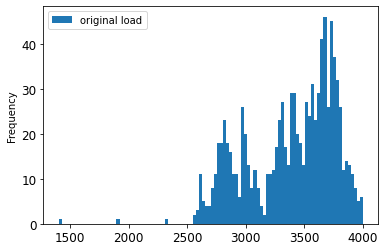

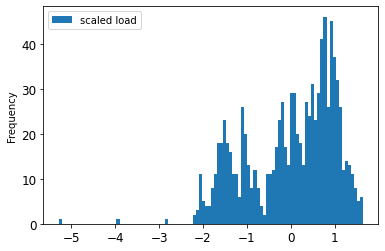

In [19]:
stlf_data[(stlf_data.index >=7393) & (stlf_data.index <=8353)][['Cons']].rename(columns={'Cons':'original load'}).plot.hist(bins=100, fontsize=12)
valid[(valid.index >=7393) & (valid.index <=8353)][['Cons']].rename(columns={'Cons':'scaled load'}).plot.hist(bins=100, fontsize=12)
plt.show()

In [20]:
valid_shifted = valid.copy()
valid_shifted=valid_shifted.astype(np.float64)
valid_shifted['y_t+100'] = valid_shifted['Cons'].shift(-100)
valid_shifted.head(10)

,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J,y_t+100
7393,0.115754,-0.239374,1.059595,-1.658081,0.810998,0.815789,0.054853,0.014369,-0.104364,0.027172,0.322984,0.285065,0.097882,-0.910088
7394,0.137126,-0.323842,1.179973,-1.658081,0.810998,0.815789,0.113715,0.025079,0.091198,0.019207,0.244531,0.266853,0.102493,-0.960846
7395,0.113083,-0.408310,1.300350,-1.658081,0.810998,0.815789,0.132444,0.113440,0.134060,-0.031239,0.185692,0.096877,0.101340,-1.024961
7396,0.067668,-0.408310,1.300350,-1.513750,0.810998,0.815789,0.153849,0.054533,0.144776,-0.073720,0.219314,0.227394,0.095347,-1.105105
7397,0.011567,-0.408310,1.300350,-1.513750,0.810998,0.815789,0.119066,0.057210,0.016188,-0.012654,0.068012,0.206147,0.095577,-1.083733
7398,0.006224,-0.488254,1.343075,-1.513750,0.810998,0.815789,0.140471,0.116117,0.026904,-0.060445,0.146465,0.154547,0.094425,-0.966189
7399,-0.132692,-0.568197,1.385800,-1.513750,0.810998,0.815789,0.116391,0.134861,0.115308,-0.100271,0.171682,0.020994,0.073680,-0.966189
7400,-0.242222,-0.568197,1.385800,-1.369419,0.810998,0.815789,0.070906,0.156281,0.056372,-0.071065,0.076418,0.109018,0.048555,-1.008932
7401,-0.202150,-0.568197,1.385800,-1.369419,0.810998,0.815789,0.014720,0.121473,0.059051,-0.156027,0.003569,0.045277,0.026658,-1.067705
7402,-0.359766,-0.664732,1.388913,-1.369419,0.810998,0.815789,0.009369,0.142893,0.117987,-0.116201,0.037191,0.011889,-0.013911,-1.113119


In [21]:
valid_shifted = valid_shifted.rename(columns={'Cons':'Cons_original'})
valid_shifted.head(10)

,Cons_original,Temp,Hum,A,B,C,D,E,F,G,H,I,J,y_t+100
7393,0.115754,-0.239374,1.059595,-1.658081,0.810998,0.815789,0.054853,0.014369,-0.104364,0.027172,0.322984,0.285065,0.097882,-0.910088
7394,0.137126,-0.323842,1.179973,-1.658081,0.810998,0.815789,0.113715,0.025079,0.091198,0.019207,0.244531,0.266853,0.102493,-0.960846
7395,0.113083,-0.408310,1.300350,-1.658081,0.810998,0.815789,0.132444,0.113440,0.134060,-0.031239,0.185692,0.096877,0.101340,-1.024961
7396,0.067668,-0.408310,1.300350,-1.513750,0.810998,0.815789,0.153849,0.054533,0.144776,-0.073720,0.219314,0.227394,0.095347,-1.105105
7397,0.011567,-0.408310,1.300350,-1.513750,0.810998,0.815789,0.119066,0.057210,0.016188,-0.012654,0.068012,0.206147,0.095577,-1.083733
7398,0.006224,-0.488254,1.343075,-1.513750,0.810998,0.815789,0.140471,0.116117,0.026904,-0.060445,0.146465,0.154547,0.094425,-0.966189
7399,-0.132692,-0.568197,1.385800,-1.513750,0.810998,0.815789,0.116391,0.134861,0.115308,-0.100271,0.171682,0.020994,0.073680,-0.966189
7400,-0.242222,-0.568197,1.385800,-1.369419,0.810998,0.815789,0.070906,0.156281,0.056372,-0.071065,0.076418,0.109018,0.048555,-1.008932
7401,-0.202150,-0.568197,1.385800,-1.369419,0.810998,0.815789,0.014720,0.121473,0.059051,-0.156027,0.003569,0.045277,0.026658,-1.067705
7402,-0.359766,-0.664732,1.388913,-1.369419,0.810998,0.815789,0.009369,0.142893,0.117987,-0.116201,0.037191,0.011889,-0.013911,-1.113119


In [22]:
valid_shifted = valid_shifted.dropna(how='any')

In [23]:
valid_shifted.tail(10)

,Cons_original,Temp,Hum,A,B,C,D,E,F,G,H,I,J,y_t+100
8244,0.863764,0.445421,-0.278271,1.372873,1.259944,-1.225808,0.801333,0.970271,0.763607,0.775899,1.401713,1.729865,0.907403,0.495102
8245,0.946580,0.445421,-0.278271,1.372873,1.259944,-1.225808,0.814711,0.849779,0.768965,0.807760,1.370892,1.723795,0.923538,0.481745
8246,1.117553,0.305144,-0.106015,1.372873,1.259944,-1.225808,0.913706,0.946173,0.870764,0.988304,1.693109,1.848242,0.945666,0.529831
8247,1.061453,0.164867,0.066242,1.372873,1.259944,-1.225808,0.927084,0.847102,0.975242,1.102471,1.695911,1.890736,0.953964,0.591275
8248,1.050767,0.164867,0.066242,1.517204,1.259944,-1.225808,0.868222,0.804260,0.972563,1.110436,1.791175,1.833065,0.961571,0.607304
8249,1.021381,0.164867,0.066242,1.517204,1.259944,-1.225808,0.951164,0.817648,0.852012,1.171503,1.782770,1.851277,0.977015,0.676762
8250,1.114882,0.098499,0.119643,1.517204,1.259944,-1.225808,1.122399,0.916719,0.948453,1.086541,1.788374,1.969654,0.992228,0.895822
8251,1.077481,0.032131,0.173044,1.517204,1.259944,-1.225808,1.066213,0.930107,0.849333,1.176813,1.830402,2.051607,1.012742,0.810335
8252,1.077481,0.032131,0.173044,1.661535,1.259944,-1.225808,1.055511,0.871200,0.806470,1.229914,1.715524,1.987866,1.036945,0.901165
8253,1.253798,0.032131,0.173044,1.661535,1.259944,-1.225808,1.026079,0.954206,0.819865,1.283015,1.827600,2.009113,1.075208,0.842392


In [24]:
y_valid = valid_shifted[['y_t+100']]
y_valid


,y_t+100
7393,-0.910088
7394,-0.960846
7395,-1.024961
7396,-1.105105
7397,-1.083733
...,...
8249,0.676762
8250,0.895822
8251,0.810335
8252,0.901165


In [25]:
X_valid = valid_shifted[['Cons_original','Temp','Hum','A','B','C','D','E','F','G','H','I','J']]
X_valid


,Cons_original,Temp,Hum,A,B,C,D,E,F,G,H,I,J
7393,0.115754,-0.239374,1.059595,-1.658081,0.810998,0.815789,0.054853,0.014369,-0.104364,0.027172,0.322984,0.285065,0.097882
7394,0.137126,-0.323842,1.179973,-1.658081,0.810998,0.815789,0.113715,0.025079,0.091198,0.019207,0.244531,0.266853,0.102493
7395,0.113083,-0.408310,1.300350,-1.658081,0.810998,0.815789,0.132444,0.113440,0.134060,-0.031239,0.185692,0.096877,0.101340
7396,0.067668,-0.408310,1.300350,-1.513750,0.810998,0.815789,0.153849,0.054533,0.144776,-0.073720,0.219314,0.227394,0.095347
7397,0.011567,-0.408310,1.300350,-1.513750,0.810998,0.815789,0.119066,0.057210,0.016188,-0.012654,0.068012,0.206147,0.095577
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8249,1.021381,0.164867,0.066242,1.517204,1.259944,-1.225808,0.951164,0.817648,0.852012,1.171503,1.782770,1.851277,0.977015
8250,1.114882,0.098499,0.119643,1.517204,1.259944,-1.225808,1.122399,0.916719,0.948453,1.086541,1.788374,1.969654,0.992228
8251,1.077481,0.032131,0.173044,1.517204,1.259944,-1.225808,1.066213,0.930107,0.849333,1.176813,1.830402,2.051607,1.012742
8252,1.077481,0.032131,0.173044,1.661535,1.259944,-1.225808,1.055511,0.871200,0.806470,1.229914,1.715524,1.987866,1.036945


In [26]:
#from keras.layers import RepeatVector

model = models.Sequential()

model.add(Dense(13, input_shape=(13,),activation='sigmoid'))
model.add(Dense(64, activation='sigmoid'))
#model.add(Dropout(0.5))
#model.add(Dropout(0.5))
#model.add(Dropout(0.1))
#model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))

In [27]:
from keras import optimizers
sgd = optimizers.Adam(lr=0.000005)
model.compile(sgd, loss='mse')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 13)                182       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                896       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 1,143
Trainable params: 1,143
Non-trainable params: 0
_________________________________________________________________


In [28]:
from keras.callbacks import EarlyStopping, ModelCheckpoint
earlystop = EarlyStopping(monitor='val_loss', min_delta=0, patience=5)

In [29]:
import time
start=time.time()

history = model.fit(X_train,
          y_train,
          batch_size=256,
          epochs=500,verbose=1,
          validation_data=(X_valid, y_valid),callbacks=[earlystop],
          )

stop=time.time()
print(f"Training time: {stop - start}s")

Epoch 1/500
29/29 [==============================] - 0s 9ms/step - loss: 1.1015 - val_loss: 1.0424
Epoch 2/500
29/29 [==============================] - 0s 3ms/step - loss: 1.1005 - val_loss: 1.0417
Epoch 3/500
29/29 [==============================] - 0s 2ms/step - loss: 1.0995 - val_loss: 1.0409
Epoch 4/500
29/29 [==============================] - 0s 2ms/step - loss: 1.0986 - val_loss: 1.0401
Epoch 5/500
29/29 [==============================] - 0s 2ms/step - loss: 1.0976 - val_loss: 1.0393
Epoch 6/500
29/29 [==============================] - 0s 2ms/step - loss: 1.0967 - val_loss: 1.0386
Epoch 7/500
29/29 [==============================] - 0s 3ms/step - loss: 1.0958 - val_loss: 1.0378
Epoch 8/500
29/29 [==============================] - 0s 2ms/step - loss: 1.0948 - val_loss: 1.0370
Epoch 9/500
29/29 [==============================] - 0s 2ms/step - loss: 1.0939 - val_loss: 1.0363
Epoch 10/500
29/29 [==============================] - 0s 2ms/step - loss: 1.0930 - val_loss: 1.0356
Epoch 11/

29/29 [==============================] - 0s 2ms/step - loss: 1.0465 - val_loss: 0.9995
Epoch 84/500
29/29 [==============================] - 0s 2ms/step - loss: 1.0460 - val_loss: 0.9991
Epoch 85/500
29/29 [==============================] - 0s 2ms/step - loss: 1.0456 - val_loss: 0.9988
Epoch 86/500
29/29 [==============================] - 0s 2ms/step - loss: 1.0452 - val_loss: 0.9985
Epoch 87/500
29/29 [==============================] - 0s 2ms/step - loss: 1.0447 - val_loss: 0.9982
Epoch 88/500
29/29 [==============================] - 0s 2ms/step - loss: 1.0443 - val_loss: 0.9979
Epoch 89/500
29/29 [==============================] - 0s 2ms/step - loss: 1.0439 - val_loss: 0.9976
Epoch 90/500
29/29 [==============================] - 0s 2ms/step - loss: 1.0435 - val_loss: 0.9973
Epoch 91/500
29/29 [==============================] - 0s 2ms/step - loss: 1.0431 - val_loss: 0.9970
Epoch 92/500
29/29 [==============================] - 0s 2ms/step - loss: 1.0426 - val_loss: 0.9967
Epoch 93/500


29/29 [==============================] - 0s 2ms/step - loss: 1.0072 - val_loss: 0.9730
Epoch 246/500
29/29 [==============================] - 0s 2ms/step - loss: 1.0071 - val_loss: 0.9730
Epoch 247/500
29/29 [==============================] - 0s 2ms/step - loss: 1.0070 - val_loss: 0.9729
Epoch 248/500
29/29 [==============================] - 0s 2ms/step - loss: 1.0069 - val_loss: 0.9728
Epoch 249/500
29/29 [==============================] - 0s 2ms/step - loss: 1.0068 - val_loss: 0.9728
Epoch 250/500
29/29 [==============================] - 0s 2ms/step - loss: 1.0067 - val_loss: 0.9727
Epoch 251/500
29/29 [==============================] - 0s 2ms/step - loss: 1.0066 - val_loss: 0.9726
Epoch 252/500
29/29 [==============================] - 0s 2ms/step - loss: 1.0064 - val_loss: 0.9726
Epoch 253/500
29/29 [==============================] - 0s 2ms/step - loss: 1.0063 - val_loss: 0.9725
Epoch 254/500
29/29 [==============================] - 0s 2ms/step - loss: 1.0062 - val_loss: 0.9724
Epoc

29/29 [==============================] - 0s 2ms/step - loss: 0.9950 - val_loss: 0.9647
Epoch 408/500
29/29 [==============================] - 0s 3ms/step - loss: 0.9950 - val_loss: 0.9647
Epoch 409/500
29/29 [==============================] - 0s 3ms/step - loss: 0.9949 - val_loss: 0.9646
Epoch 410/500
29/29 [==============================] - 0s 2ms/step - loss: 0.9948 - val_loss: 0.9646
Epoch 411/500
29/29 [==============================] - 0s 2ms/step - loss: 0.9948 - val_loss: 0.9645
Epoch 412/500
29/29 [==============================] - 0s 2ms/step - loss: 0.9947 - val_loss: 0.9644
Epoch 413/500
29/29 [==============================] - 0s 2ms/step - loss: 0.9947 - val_loss: 0.9644
Epoch 414/500
29/29 [==============================] - 0s 2ms/step - loss: 0.9946 - val_loss: 0.9643
Epoch 415/500
29/29 [==============================] - 0s 2ms/step - loss: 0.9946 - val_loss: 0.9642
Epoch 416/500
29/29 [==============================] - 0s 2ms/step - loss: 0.9945 - val_loss: 0.9642
Epoc

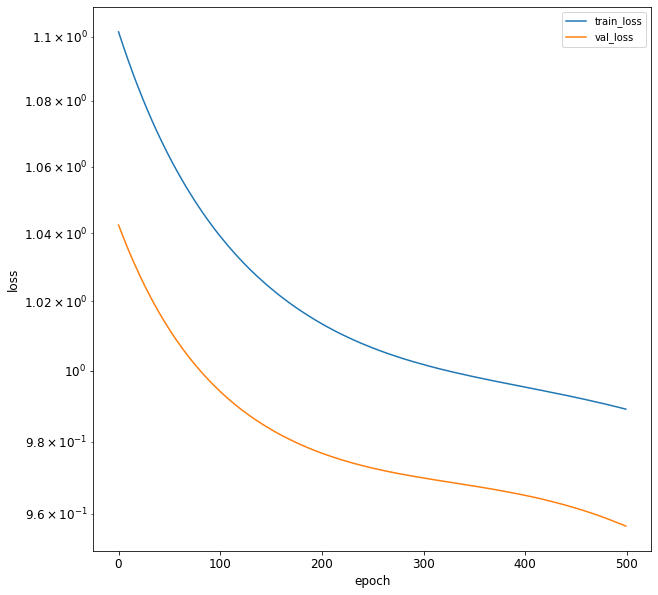

In [30]:
plot_df = pd.DataFrame.from_dict({'train_loss':history.history['loss'], 'val_loss':history.history['val_loss']})
plot_df.plot(logy=True, figsize=(10,10), fontsize=12)
plt.xlabel('epoch', fontsize=12)
plt.ylabel('loss', fontsize=12)
plt.show()



In [31]:
test = stlf_data.copy()[(stlf_data.index >= 8354) & (stlf_data.index<= 8565)][['Cons','Temp','Hum','A','B','C','D','E','F','G','H','I','J']]
test.head(20)

,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J
8354,3627.0,29.077452,82.552515,1.0,2.0,1.0,3719.0,3582.0,3589.0,3879.0,3878.0,3963.0,3631.000000
8355,3585.0,28.542452,85.595820,1.0,2.0,1.0,3687.0,3605.0,3551.0,3878.0,3866.0,3961.0,3633.833333
8356,3596.0,28.542452,85.595820,2.0,2.0,1.0,3721.0,3611.0,3569.0,3849.0,3800.0,3924.0,3636.083333
8357,3538.0,28.542452,85.595820,2.0,2.0,1.0,3699.0,3637.0,3564.0,3846.0,3781.0,3843.0,3633.916667
8358,3541.0,28.412452,85.940575,2.0,2.0,1.0,3627.0,3719.0,3582.0,3817.0,3758.0,3816.0,3630.500000
8359,3509.0,28.282452,86.285330,2.0,2.0,1.0,3585.0,3687.0,3605.0,3808.0,3761.0,3813.0,3622.500000
8360,3459.0,28.282452,86.285330,3.0,2.0,1.0,3596.0,3721.0,3611.0,3781.0,3766.0,3805.0,3609.833333
8361,3469.0,28.282452,86.285330,3.0,2.0,1.0,3538.0,3699.0,3637.0,3774.0,3724.0,3714.0,3595.833333
8362,3483.0,27.852452,86.661775,3.0,2.0,1.0,3541.0,3627.0,3719.0,3746.0,3721.0,3747.0,3576.166667
8363,3436.0,27.422451,87.038220,3.0,2.0,1.0,3509.0,3585.0,3687.0,3734.0,3689.0,3734.0,3555.250000


In [32]:
from sklearn.preprocessing import MinMaxScaler
scaler = StandardScaler()
test[['Cons', 'Temp', 'Hum', 'A','B','C','D','E','F','G','H','I','J']] = scaler.fit_transform(test)
test.head(10)
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 212 entries, 8354 to 8565
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Cons    212 non-null    float64
 1   Temp    212 non-null    float64
 2   Hum     212 non-null    float64
 3   A       212 non-null    float64
 4   B       212 non-null    float64
 5   C       212 non-null    float64
 6   D       212 non-null    float64
 7   E       212 non-null    float64
 8   F       212 non-null    float64
 9   G       212 non-null    float64
 10  H       212 non-null    float64
 11  I       212 non-null    float64
 12  J       212 non-null    float64
dtypes: float64(13)
memory usage: 23.2 KB


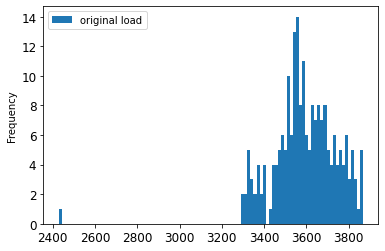

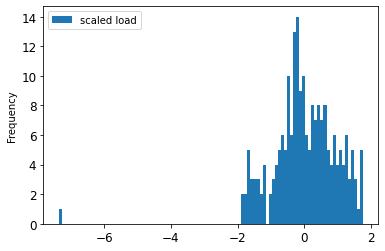

In [33]:
stlf_data[(stlf_data.index >= 8354) & (stlf_data.index <=8565)][['Cons']].rename(columns={'Cons':'original load'}).plot.hist(bins=100, fontsize=12)
test[(test.index >=8354) & (test.index <= 8565)][['Cons']].rename(columns={'Cons':'scaled load'}).plot.hist(bins=100, fontsize=12)
plt.show()

In [34]:
test_shifted = test.copy()
test_shifted=test_shifted.astype(np.float64)
test_shifted['y_t+100'] = test_shifted['Cons'].shift(-100)
test_shifted.head(10)


,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J,y_t+100
8354,0.230802,-0.816050,0.702767,-1.498364,-1.004934,0.0,0.790719,-0.081883,-0.033282,2.029484,1.363377,1.497244,0.298366,0.807419
8355,-0.035329,-1.043549,0.971002,-1.498364,-1.004934,0.0,0.588745,0.063409,-0.273319,2.023599,1.309269,1.485657,0.320976,0.718709
8356,0.034372,-1.043549,0.971002,-1.357685,-1.004934,0.0,0.803343,0.101311,-0.159617,1.852959,1.011680,1.271292,0.338931,0.585643
8357,-0.333142,-1.043549,0.971002,-1.357685,-1.004934,0.0,0.664485,0.265555,-0.191201,1.835306,0.926011,0.802008,0.321641,0.439905
8358,-0.314132,-1.098828,1.001389,-1.357685,-1.004934,0.0,0.210043,0.783554,-0.077499,1.664665,0.822305,0.645580,0.294376,0.553961
8359,-0.516899,-1.154108,1.031775,-1.357685,-1.004934,0.0,-0.055049,0.581408,0.067786,1.611708,0.835832,0.628199,0.230536,0.408223
8360,-0.833721,-1.154108,1.031775,-1.217006,-1.004934,0.0,0.014380,0.796188,0.105686,1.452835,0.858377,0.581850,0.129456,0.142092
8361,-0.770357,-1.154108,1.031775,-1.217006,-1.004934,0.0,-0.351699,0.657213,0.269922,1.411646,0.669002,0.054630,0.017735,0.097737
8362,-0.681646,-1.336958,1.064955,-1.217006,-1.004934,0.0,-0.332764,0.202384,0.787896,1.246889,0.655475,0.245819,-0.139205,0.211793
8363,-0.979459,-1.519807,1.098135,-1.217006,-1.004934,0.0,-0.534738,-0.062932,0.585760,1.176279,0.511189,0.170502,-0.306120,0.281494


In [35]:
test_shifted = test_shifted.rename(columns={'Cons':'Cons_original'})
test_shifted.head(10)

,Cons_original,Temp,Hum,A,B,C,D,E,F,G,H,I,J,y_t+100
8354,0.230802,-0.816050,0.702767,-1.498364,-1.004934,0.0,0.790719,-0.081883,-0.033282,2.029484,1.363377,1.497244,0.298366,0.807419
8355,-0.035329,-1.043549,0.971002,-1.498364,-1.004934,0.0,0.588745,0.063409,-0.273319,2.023599,1.309269,1.485657,0.320976,0.718709
8356,0.034372,-1.043549,0.971002,-1.357685,-1.004934,0.0,0.803343,0.101311,-0.159617,1.852959,1.011680,1.271292,0.338931,0.585643
8357,-0.333142,-1.043549,0.971002,-1.357685,-1.004934,0.0,0.664485,0.265555,-0.191201,1.835306,0.926011,0.802008,0.321641,0.439905
8358,-0.314132,-1.098828,1.001389,-1.357685,-1.004934,0.0,0.210043,0.783554,-0.077499,1.664665,0.822305,0.645580,0.294376,0.553961
8359,-0.516899,-1.154108,1.031775,-1.357685,-1.004934,0.0,-0.055049,0.581408,0.067786,1.611708,0.835832,0.628199,0.230536,0.408223
8360,-0.833721,-1.154108,1.031775,-1.217006,-1.004934,0.0,0.014380,0.796188,0.105686,1.452835,0.858377,0.581850,0.129456,0.142092
8361,-0.770357,-1.154108,1.031775,-1.217006,-1.004934,0.0,-0.351699,0.657213,0.269922,1.411646,0.669002,0.054630,0.017735,0.097737
8362,-0.681646,-1.336958,1.064955,-1.217006,-1.004934,0.0,-0.332764,0.202384,0.787896,1.246889,0.655475,0.245819,-0.139205,0.211793
8363,-0.979459,-1.519807,1.098135,-1.217006,-1.004934,0.0,-0.534738,-0.062932,0.585760,1.176279,0.511189,0.170502,-0.306120,0.281494


In [36]:
test_shifted = test_shifted.dropna(how='any')
test_shifted.tail(5)

,Cons_original,Temp,Hum,A,B,C,D,E,F,G,H,I,J,y_t+100
8461,0.097737,-0.801167,1.015461,-1.076327,0.516823,0.0,0.418329,0.714066,1.533273,-0.889065,0.497662,-0.107592,0.831697,-0.225422
8462,0.211793,-0.813925,1.001861,-1.076327,0.516823,0.0,0.531940,0.777237,1.362721,-0.977327,0.411993,-0.304576,0.708006,-0.187403
8463,0.281494,-0.826682,0.988262,-1.076327,0.516823,0.0,0.386770,0.688798,1.223752,-1.112663,0.348868,-0.211877,0.606261,-0.364824
8464,0.015363,-0.826682,0.988262,-0.935648,0.516823,0.0,0.121679,0.556140,0.990032,-1.189157,0.407484,-0.275607,0.501191,-0.339478
8465,-0.130375,-0.826682,0.988262,-0.935648,0.516823,0.0,0.077497,0.410847,0.718412,-1.324493,0.019716,-0.310369,0.409421,-0.396506


In [37]:
y_test = test_shifted[['y_t+100']]
y_test

,y_t+100
8354,0.807419
8355,0.718709
8356,0.585643
8357,0.439905
8358,0.553961
...,...
8461,-0.225422
8462,-0.187403
8463,-0.364824
8464,-0.339478


In [38]:
X_test = test_shifted[['Cons_original','Temp','Hum','A','B','C','D','E','F','G','H','I','J']]
X_test

,Cons_original,Temp,Hum,A,B,C,D,E,F,G,H,I,J
8354,0.230802,-0.816050,0.702767,-1.498364,-1.004934,0.0,0.790719,-0.081883,-0.033282,2.029484,1.363377,1.497244,0.298366
8355,-0.035329,-1.043549,0.971002,-1.498364,-1.004934,0.0,0.588745,0.063409,-0.273319,2.023599,1.309269,1.485657,0.320976
8356,0.034372,-1.043549,0.971002,-1.357685,-1.004934,0.0,0.803343,0.101311,-0.159617,1.852959,1.011680,1.271292,0.338931
8357,-0.333142,-1.043549,0.971002,-1.357685,-1.004934,0.0,0.664485,0.265555,-0.191201,1.835306,0.926011,0.802008,0.321641
8358,-0.314132,-1.098828,1.001389,-1.357685,-1.004934,0.0,0.210043,0.783554,-0.077499,1.664665,0.822305,0.645580,0.294376
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8461,0.097737,-0.801167,1.015461,-1.076327,0.516823,0.0,0.418329,0.714066,1.533273,-0.889065,0.497662,-0.107592,0.831697
8462,0.211793,-0.813925,1.001861,-1.076327,0.516823,0.0,0.531940,0.777237,1.362721,-0.977327,0.411993,-0.304576,0.708006
8463,0.281494,-0.826682,0.988262,-1.076327,0.516823,0.0,0.386770,0.688798,1.223752,-1.112663,0.348868,-0.211877,0.606261
8464,0.015363,-0.826682,0.988262,-0.935648,0.516823,0.0,0.121679,0.556140,0.990032,-1.189157,0.407484,-0.275607,0.501191


In [39]:
import time
start=time.time()

predictions = model.predict(X_test)
stop=time.time()
predictions

print(f"Test time: {stop - start}s")

Test time: 0.20701169967651367s


In [40]:
feature=stlf_data.copy()[(stlf_data.index >= 8354) & (stlf_data.index <=8565)][['Cons']]
#test_mean=cons.mean()
#test_mean
load_mean=feature.mean()
print(load_mean)
load_std=feature.std()
print(load_std)

Cons    3590.575472
dtype: float64
Cons    158.190655
dtype: float64


In [41]:
load_mean=3590.575472
load_std=158.190655
rescaled_target_load=(y_test*load_std)+load_mean
print(rescaled_target_load.shape)


(112, 1)


In [42]:
rescaled_predicted_load=(predictions*load_std)+load_mean
print(rescaled_predicted_load.shape)

(112, 1)


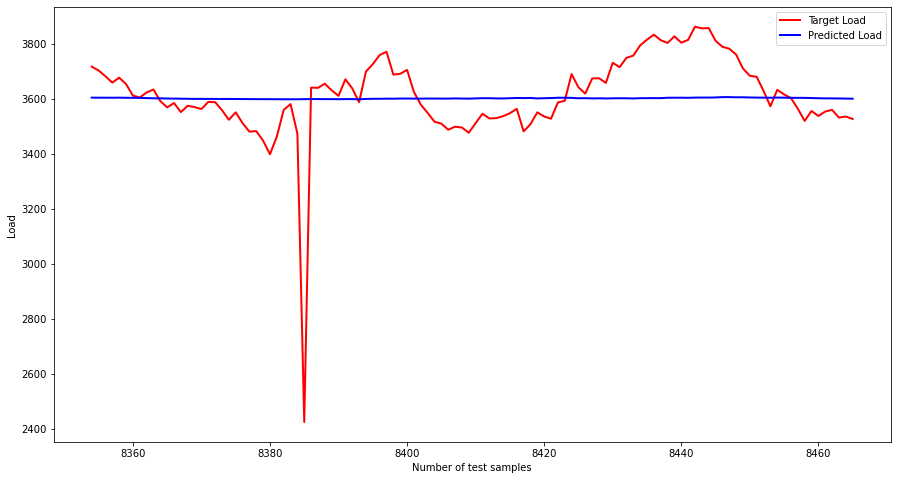

In [43]:
timestamp = y_test.index
plt.figure(figsize = (15,8))
plt.plot(timestamp,rescaled_target_load,label="Target Load",color='red', linestyle='solid',linewidth=2)

plt.plot(timestamp,rescaled_predicted_load,label="Predicted Load",color='blue', linestyle='solid',linewidth=2)

plt.xlabel('Number of test samples') 
plt.ylabel('Load') 
plt.legend()
plt.show()

In [44]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true),np.array(y_pred)

    ## Note: does not handle mix 1d representation
    #if _is_1d(y_true): 
    #    y_true, y_pred = _check_1d_array(y_true, y_pred)

    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

MAPE=mean_absolute_percentage_error(rescaled_target_load, rescaled_predicted_load)
print(MAPE)

2.770950864703515


In [45]:
MPE=np.mean((rescaled_target_load - rescaled_predicted_load) / rescaled_target_load) * 100
print(MPE)

y_t+100    0.106661
dtype: float64


In [46]:
PE=((rescaled_target_load - rescaled_predicted_load / rescaled_target_load)) * 100
APE=np.abs(PE)
print(APE)

            y_t+100
8354  371733.192374
8355  370329.516877
8356  368223.992797
8357  365917.933832
8358  367722.671696
...             ...
8461  355390.231390
8462  355991.825054
8463  353184.402319
8464  353585.475657
8465  352683.098513

[112 rows x 1 columns]


In [47]:
error = np.subtract(rescaled_target_load,rescaled_predicted_load)
sqerr=np.square(error)
print(sqerr)
MSE=sqerr.mean()
print(MSE)

           y_t+100
8354  12715.609454
8355   9787.692511
8356   6080.573809
8357   3022.101650
8358   5301.039933
...            ...
8461   2297.720497
8462   1750.240021
8463   4845.606985
8464   4252.606346
8465   5440.274264

[112 rows x 1 columns]
y_t+100    23808.109632
dtype: float64


In [48]:
RMSE=MSE**0.5
print(RMSE)

y_t+100    154.298767
dtype: float64


In [49]:
a=np.array(rescaled_predicted_load)

In [50]:
for i in  range(0,102):
    b=a[i]
    print(b)

[3605.538]
[3605.3357]
[3605.2407]
[3605.1907]
[3605.3987]
[3604.9512]
[3604.9187]
[3604.5076]
[3603.8047]
[3603.1216]
[3602.93]
[3602.2886]
[3602.0232]
[3601.6035]
[3601.3252]
[3600.844]
[3600.9817]
[3600.813]
[3600.7556]
[3600.653]
[3600.6863]
[3600.545]
[3600.3794]
[3600.2207]
[3600.047]
[3599.9634]
[3599.8938]
[3599.7068]
[3599.6484]
[3599.5674]
[3599.6885]
[3599.9724]
[3600.3015]
[3600.255]
[3600.1177]
[3600.121]
[3599.845]
[3600.194]
[3600.2175]
[3599.3635]
[3600.8367]
[3601.2607]
[3601.384]
[3601.758]
[3601.7021]
[3602.109]
[3602.2817]
[3601.9802]
[3601.8843]
[3602.249]
[3602.0906]
[3602.002]
[3602.0417]
[3602.6272]
[3602.2385]
[3601.7874]
[3602.6697]
[3603.4712]
[3603.39]
[3602.7197]
[3602.5427]
[3603.4324]
[3604.3145]
[3603.847]
[3604.3955]
[3602.6006]
[3603.436]
[3603.9854]
[3605.1265]
[3605.0654]
[3604.666]
[3603.2268]
[3603.5515]
[3602.711]
[3603.0386]
[3602.571]
[3602.98]
[3603.3074]
[3603.136]
[3602.5374]
[3603.483]
[3603.6086]
[3603.8313]
[3603.6514]
[3605.1106]
[3605.18